In [2]:
import numpy as np #import the numpy package since this will be useful
import matplotlib.pyplot as plt #plotting package
from ipywidgets import interact
from MPC2_phy_proj import *

# A typical graph

## define plot()

In [93]:
L = 4 # in [m]
nq = 10 #total number of charge from -L to +L
lambda_q = 1 # parameter, charge per unit length, in [qC/m]

#Thus, qi (charge per discrete charge) can be calculated, in [qC]
qi = np.full(nq,lambda_q*2*L/nq) #charge per discrete charge, in [qC]

#Generate the ri, for all the charges
ri = []
for i in np.linspace(-L,+L,nq):
    ri.append([i,0,0])
ri = np.array(ri)

In [13]:
def yieldqiri(L,q_single,lambda_q):
    #Thus, qi (charge per discrete charge) can be calculated, in [qC]
    qi = np.full(nq,q_single) #charge per discrete charge, in [qC]

    #Generate the ri, for all the charges
    ri = []
    for i in np.linspace(-L,+L,nq):
        ri.append([i,0,0])
    ri = np.array(ri)
    # --------end of parameters-------- 
    
    #calculate the sampling point under the effect of the finite line and infinite one
    E_finiteLine = []
    for i in Efield_z:
        E_finiteLine.append(-Efield_sum(i,ri,qi)[2])

    #seperate the positive and negtive parts
    E_finL_posi = []
    E_finL_neg = []
    z_finL_posi = []
    z_finL_neg = []

    for i in range(len(Efield_z_only)):
        if E_finiteLine[i]>0:
            E_finL_posi.append(E_finiteLine[i])
            z_finL_posi.append(Efield_z_only[i])
        else:
            E_finL_neg.append(E_finiteLine[i])
            z_finL_neg.append(Efield_z_only[i])       
            
    return [E_finL_posi,E_finL_neg,z_finL_posi,z_finL_neg]

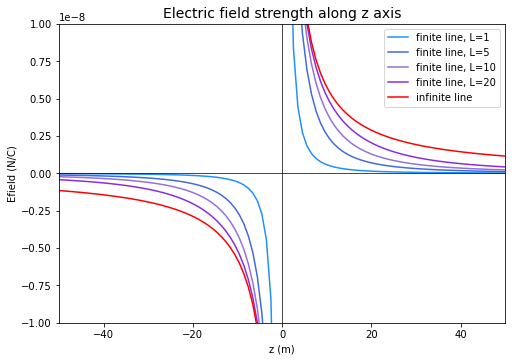

In [231]:
#sampling matrix
Efield_z = []
num_samp = 100 # number of sampling along z axis
z = 50 #sampling length along z axis
for i in np.linspace(-z,+z,num_samp):
    Efield_z.append([0,0,i])
Efield_z_only = np.linspace(-z,+z,num_samp)

E_num_sol=


L=1
# charge for each q
q_single = 1 # unit in qC
lambda_q = 20
nq = int(lambda_q*2*L/ q_single)
Efp01,Efn01,zfp01,zfn01 = yieldqiri(L,q_single,lambda_q)[0],yieldqiri(L,q_single,lambda_q)[1],\
                                                yieldqiri(L,q_single,lambda_q)[2],yieldqiri(L,q_single,lambda_q)[3]

L=5
# charge for each q
q_single = 1 # unit in qC
lambda_q = 20
nq = int(lambda_q*2*L/ q_single)
Efp03,Efn03,zfp03,zfn03 = yieldqiri(L,q_single,lambda_q)[0],yieldqiri(L,q_single,lambda_q)[1],\
                                                yieldqiri(L,q_single,lambda_q)[2],yieldqiri(L,q_single,lambda_q)[3]

L=10
# charge for each q
q_single = 1 # unit in qC
lambda_q = 20
nq = int(lambda_q*2*L/ q_single)
Efp05,Efn05,zfp05,zfn05 = yieldqiri(L,q_single,lambda_q)[0],yieldqiri(L,q_single,lambda_q)[1],\
                                                yieldqiri(L,q_single,lambda_q)[2],yieldqiri(L,q_single,lambda_q)[3]

L=20
# charge for each q
q_single = 1 # unit in qC
lambda_q = 20
nq = int(lambda_q*2*L/ q_single)
Efp07,Efn07,zfp07,zfn07 = yieldqiri(L,q_single,lambda_q)[0],yieldqiri(L,q_single,lambda_q)[1],\
                                                yieldqiri(L,q_single,lambda_q)[2],yieldqiri(L,q_single,lambda_q)[3]

#calculate the sampling point under the effect of the finite line and infinite one
E_infiniteLine = []
for i in Efield_z:
    E_finiteLine.append(-Efield_sum(i,ri,qi)[2])
    #minus sign means the vector should point from the charge along the line to the test point sampling along z axis
    #print(-Efield_sum(i,ri,qi))
    E_infiniteLine.append(2*K*lambda_q*e/i[2])

#seperate the positive and negtive parts
E_infinL_posi = []
E_infinL_neg = []
z_infinL_posi = []
z_infinL_neg = []

for i in range(len(Efield_z_only)):      
    if E_infiniteLine[i]>0:
        E_infinL_posi.append(E_infiniteLine[i])
        z_infinL_posi.append(Efield_z_only[i])
    else:
        E_infinL_neg.append(E_infiniteLine[i])
        z_infinL_neg.append(Efield_z_only[i])  

#Plot the electric field strength against z axis
plt.figure(figsize=(8,5.5)) 
plt.title('Electric field strength along z axis',fontsize=14)
plt.plot(zfp01, Efp01, marker='', label='finite line, L=1',color='dodgerblue')
plt.plot(zfn01, Efn01, marker='',color='dodgerblue')


plt.plot(zfp03, Efp03, marker='', label='finite line, L=5',color='royalblue')
plt.plot(zfn03, Efn03, marker='',color='royalblue')


plt.plot(zfp05, Efp05, marker='', label='finite line, L=10',color='mediumpurple')
plt.plot(zfn05, Efn05, marker='',color='mediumpurple')


plt.plot(zfp07, Efp07, marker='', label='finite line, L=20',color='blueviolet')
plt.plot(zfn07, Efn07, marker='',color='blueviolet')

plt.plot(z_infinL_posi, E_infinL_posi, marker='', label='infinite line',color='r')
plt.plot(z_infinL_neg, E_infinL_neg, marker='',color='r')

plt.xlabel('z (m)')
plt.ylabel('Efield (N/C)')

plt.xlim([-50,50])
plt.ylim([-1e-8,1e-8])


plt.axvline(0,linewidth=0.7,color='black')
plt.axhline(0,linewidth=0.7,color='black')
plt.legend()
plt.show()

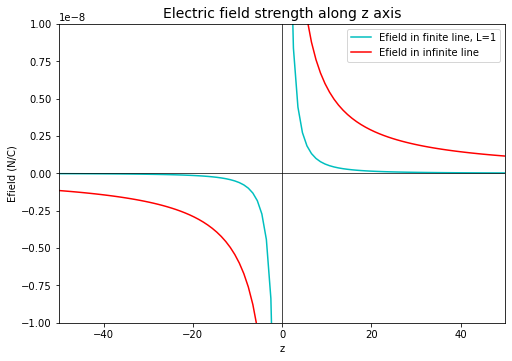

In [342]:
#sampling matrix
Efield_z = []
num_samp = 100 # number of sampling along z axis
z = 50 #sampling length along z axis
for i in np.linspace(-z,+z,num_samp):
    Efield_z.append([0,0,i])
Efield_z_only = np.linspace(-z,+z,num_samp)

L=1
q_single = 1 # unit in qC
lambda_q = 20
nq = int(lambda_q*2*L/ q_single)

Efp01,Efn01,zfp01,zfn01 = yieldqiri(L,q_single,lambda_q)[0],yieldqiri(L,q_single,lambda_q)[1],\
                                                yieldqiri(L,q_single,lambda_q)[2],yieldqiri(L,q_single,lambda_q)[3]

#calculate the sampling point under the effect of the finite line and infinite one
E_infiniteLine = []
for i in Efield_z:
    E_finiteLine.append(-Efield_sum(i,ri,qi)[2])
    #minus sign means the vector should point from the charge along the line to the test point sampling along z axis
    #print(-Efield_sum(i,ri,qi))
    E_infiniteLine.append(2*K*lambda_q*e/i[2])

#seperate the positive and negtive parts
E_infinL_posi = []
E_infinL_neg = []
z_infinL_posi = []
z_infinL_neg = []

for i in range(len(Efield_z_only)):      
    if E_infiniteLine[i]>0:
        E_infinL_posi.append(E_infiniteLine[i])
        z_infinL_posi.append(Efield_z_only[i])
    else:
        E_infinL_neg.append(E_infiniteLine[i])
        z_infinL_neg.append(Efield_z_only[i])  

#Plot the electric field strength against z axis
plt.figure(figsize=(8,5.5)) 
plt.title('Electric field strength along z axis',fontsize=14)
plt.plot(zfp01, Efp01, marker='', label='Efield in finite line, L=1',color='c')
plt.plot(zfn01, Efn01, marker='',color='c')

plt.plot(z_infinL_posi, E_infinL_posi, marker='', label='Efield in infinite line',color='r')
plt.plot(z_infinL_neg, E_infinL_neg, marker='',color='r')

plt.xlabel('z')
plt.ylabel('Efield (N/C)')

plt.xlim([-50,50])
plt.ylim([-1e-8,1e-8])


plt.axvline(0,linewidth=0.7,color='black')
plt.axhline(0,linewidth=0.7,color='black')
plt.legend()
plt.show()

# num sol and ana sol

In [22]:
def sepe_qiri(z_l,E_l):
    #seperate the positive and negtive parts
    E_finL_posi = []
    E_finL_neg = []
    z_finL_posi = []
    z_finL_neg = []

    for i in range(len(z_l)):
        if E_l[i]>0:
            E_finL_posi.append(E_l[i])
            z_finL_posi.append(z_l[i])
        else:
            E_finL_neg.append(E_l[i])
            z_finL_neg.append(z_l[i])       
            
    return [E_finL_posi,E_finL_neg,z_finL_posi,z_finL_neg]

In [23]:
def E_fld_num(y):
    ans = K*2*lambda_q*L*e/(y*(L**2+y**2)**0.5)
    return ans

In [27]:
def yield_density_L_qsin_lamb(L,q_single,lambda_q):

    #sampling matrix
    Efield_z = []
    num_samp = 100 # number of sampling along z axis
    z = 50 #sampling length along z axis
    for i in np.linspace(-z,+z,num_samp):
        Efield_z.append([0,0,i])
    Efield_z_only = np.linspace(-z,+z,num_samp)

    L=L
    q_single = q_single # unit in qC
    lambda_q = lambda_q
    nq = int(lambda_q*2*L/ q_single)

    Efp01,Efn01,zfp01,zfn01 = yieldqiri(L,q_single,lambda_q)[0],yieldqiri(L,q_single,lambda_q)[1],\
                                                    yieldqiri(L,q_single,lambda_q)[2],yieldqiri(L,q_single,lambda_q)[3]

    E_num_L = E_fld_num(Efield_z_only)
    Efp_num,Efn_num,zfp_num,zfn_num = sepe_qiri(Efield_z_only,E_num_L)[0],sepe_qiri(Efield_z_only,E_num_L)[1],\
                                      sepe_qiri(Efield_z_only,E_num_L)[2],sepe_qiri(Efield_z_only,E_num_L)[3]


    #Plot the electric field strength against z axis
    plt.figure(figsize=(8,5.5)) 
    plt.title('Electric field strength along z axis',fontsize=14)
    plt.plot(zfp01, Efp01, marker='', label='Numerical solution',color='c')
    plt.plot(zfn01, Efn01, marker='',color='c')

    plt.plot(zfp_num, Efp_num, marker='', label='Analytic solution',color='magenta')
    plt.plot(zfn_num, Efn_num, marker='',color='magenta')


    plt.xlabel('z')
    plt.ylabel('Efield (N/C)')

    plt.xlim([-50,50])
    plt.ylim([-1e-8,1e-8])


    plt.axvline(0,linewidth=0.7,color='black')
    plt.axhline(0,linewidth=0.7,color='black')
    plt.legend()
    plt.show()

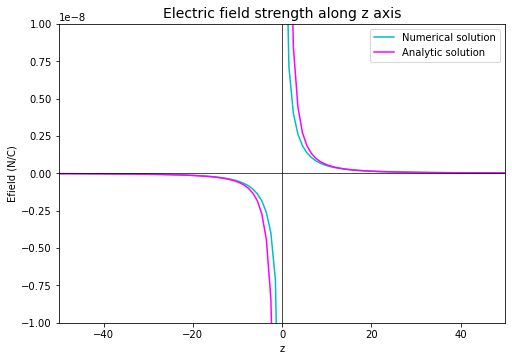

In [28]:
yield_density_L_qsin_lamb(5,1,1)

In [33]:
# test the critical value
def xzyield_density_L_qsin_lamb(L,q_single,lambda_q):
    L = L # in [m]

    q_single = q_single # unit in qC
    lambda_q = lambda_q
    nq = int(lambda_q*2*L/ q_single)



    #Thus, qi (charge per discrete charge) can be calculated, in [qC]
    qi = np.full(nq,q_single) #charge per discrete charge, in [qC]

    #Generate the ri, for all the charges
    ri = []
    for i in np.linspace(-L,+L,nq):
        ri.append([i,0,0])
    ri = np.array(ri)
    
    
    
    #Set all the test points and vectors for each points

    ri_2D = []
    for i in np.linspace(-L,+L,nq):
        ri_2D.append([i,0])
    ri_2D = np.array(ri_2D)

    #generate the mesh points for Efield
    x_list = []
    z_list = []
    num_samp_x = 80 # number of sampling along x,z axis
    len_x =10 #sampling length along x axis
    num_samp_z = 40 # number of sampling along z axis
    len_z = 5 #sampling length along z axis
    x_samp=np.linspace(-len_x,+len_x,num_samp_x)
    z_samp=np.linspace(-len_z,+len_z,num_samp_z)

    xx_samp, zz_samp = np.meshgrid(x_samp, z_samp)
    coord_samp =np.stack((xx_samp, zz_samp),axis=-1)
    
    
    
    
    #polt contour for Efield
    z_Efield = coord_samp
    z_Efield_magni = []

    for i in range(len(coord_samp)):
        aList=[]
        for j in range(len(coord_samp[i])):
            aList.append(np.linalg.norm(-Efield_sum(coord_samp[i][j],ri_2D,qi)))
        z_Efield_magni.append(aList)

    #print(z_Efield_magni)
    plt.contourf(xx_samp, zz_samp, z_Efield_magni)
    plt.axis('scaled')
    
    plt.xlabel('x (m)')
    plt.ylabel('z (m)')

    #plt.xlim([0,20])
    #plt.ylim([0,20])

    
    
    
    plt.colorbar()
    plt.show()

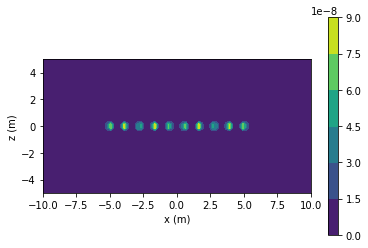

In [34]:
xzyield_density_L_qsin_lamb(5,1,1)

## 1D E_field

## 2D e_field

10


100


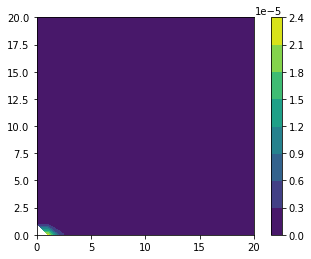

In [248]:
L = 5 # in [m]

q_single = 1 # unit in qC
lambda_q = 20
nq = int(lambda_q*L/q_single)

print(nq)
#Thus, qi (charge per discrete charge) can be calculated, in [qC]
qi = np.full(nq,q_single) #charge per discrete charge, in [qC]

#Generate the ri, for all the charges
ri = []
for i in np.linspace(0,+L,nq):
    ri.append([i,0,0])
ri = np.array(ri)




#Set all the test points and vectors for each points

ri_2D = []
for i in np.linspace(0,+L,nq):
    ri_2D.append([i,0])
ri_2D = np.array(ri_2D)

#generate the mesh points for Efield
x_list = []
z_list = []
num_samp_x = 20 # number of sampling along x,z axis
len_x = 20#sampling length along x axis
num_samp_z = 20 # number of sampling along z axis
len_z = 20 #sampling length along z axis
x_samp=np.linspace(0,+len_x,num_samp_x)
z_samp=np.linspace(0,+len_z,num_samp_z)

xx_samp, zz_samp = np.meshgrid(x_samp, z_samp)
coord_samp =np.stack((xx_samp, zz_samp),axis=-1)




#polt contour for Efield
z_Efield = coord_samp
z_Efield_magni = []

for i in range(len(coord_samp)):
    aList=[]
    for j in range(len(coord_samp[i])):
        aList.append(np.linalg.norm(Efield_sum(coord_samp[i][j],ri_2D,qi)))
    z_Efield_magni.append(aList)

#print(z_Efield_magni)
plt.contourf(xx_samp, zz_samp, z_Efield_magni)
plt.axis('scaled')
plt.colorbar()
plt.show()

## test the critical value

In [251]:
# test the critical value
def variable(here_vari):
    L = here_vari # in [m]

    q_single = 1 # unit in qC
    lambda_q = 20
    nq = int(lambda_q*2*L/ q_single)



    #Thus, qi (charge per discrete charge) can be calculated, in [qC]
    qi = np.full(nq,q_single) #charge per discrete charge, in [qC]

    #Generate the ri, for all the charges
    ri = []
    for i in np.linspace(-L,+L,nq):
        ri.append([i,0,0])
    ri = np.array(ri)
    
    
    
    #Set all the test points and vectors for each points

    ri_2D = []
    for i in np.linspace(-L,+L,nq):
        ri_2D.append([i,0])
    ri_2D = np.array(ri_2D)

    #generate the mesh points for Efield
    x_list = []
    z_list = []
    num_samp_x = 40 # number of sampling along x,z axis
    len_x =20 #sampling length along x axis
    num_samp_z = 40 # number of sampling along z axis
    len_z = 20 #sampling length along z axis
    x_samp=np.linspace(-len_x,+len_x,num_samp_x)
    z_samp=np.linspace(-len_z,+len_z,num_samp_z)

    xx_samp, zz_samp = np.meshgrid(x_samp, z_samp)
    coord_samp =np.stack((xx_samp, zz_samp),axis=-1)
    
    
    
    
    #polt contour for Efield
    z_Efield = coord_samp
    z_Efield_magni = []

    for i in range(len(coord_samp)):
        aList=[]
        for j in range(len(coord_samp[i])):
            aList.append(np.linalg.norm(-Efield_sum(coord_samp[i][j],ri_2D,qi)))
        z_Efield_magni.append(aList)

    #print(z_Efield_magni)
    plt.contourf(xx_samp, zz_samp, z_Efield_magni)
    plt.axis('scaled')
    
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')

    plt.xlim([0,20])
    plt.ylim([0,20])

    
    
    
    plt.colorbar()
    plt.show()

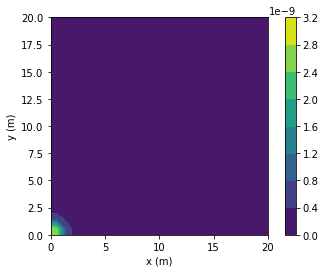

In [257]:
variable(0.025)

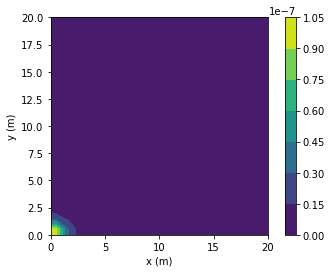

In [253]:
variable(1)

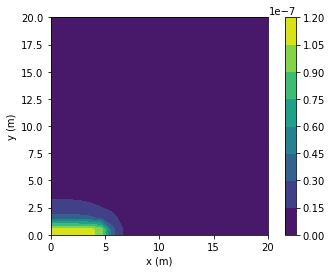

In [255]:
variable(5)

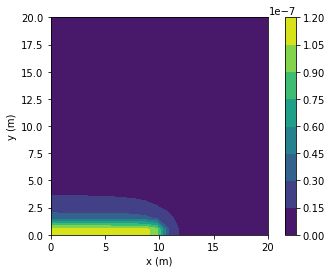

In [252]:
variable(10)

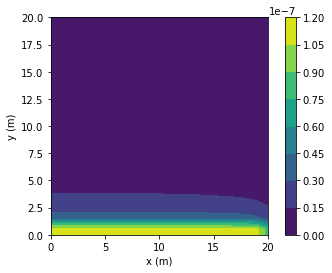

In [254]:
variable(20)

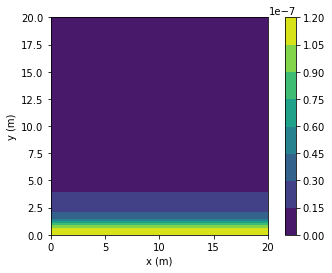

In [256]:
variable(40)

# Potential

In [ ]:

#calculate the sampling point under the effect of the finite line and infinite one
V_finiteLine = []
V_infiniteLine = []
for i in Efield_z:
    if i[2]>0:
        i2 = i + np.array([0,0,10])
    else:
        i2 = i - np.array([0,0,10])
    V_finiteLine.append(potl_sum(i,ri,qi))
    V_infiniteLine.append(2*K*lambda_q*e*np.log(100/abs(i[2])))
    #print(np.log(abs(i[2])))
          
plt.figure(figsize=(8,5.5)) 
plt.title('Electric field potential along z axis',fontsize=14)
plt.plot(Efield_z_only, V_finiteLine, marker='', label='potl in finite line')
plt.plot(Efield_z_only, V_infiniteLine, marker='', label='potl in infinite line')

plt.xlabel('z')
plt.ylabel('Potential (V)')
plt.legend()
plt.show()

In [269]:
def yieldqiri_potl(L,q_single,lambda_q):
    #Thus, qi (charge per discrete charge) can be calculated, in [qC]
    qi = np.full(nq,q_single) #charge per discrete charge, in [qC]

    #Generate the ri, for all the charges
    ri = []
    for i in np.linspace(-L,+L,nq):
        ri.append([i,0,0])
    ri = np.array(ri)
    # --------end of parameters-------- 
    
    #calculate the sampling point under the effect of the finite line and infinite one
    E_finiteLine = []
    for i in Efield_z:
        E_finiteLine.append(potl_sum(i,ri,qi))

    #seperate the positive and negtive parts
    E_finL_posi = []
    E_finL_neg = []
    z_finL_posi = []
    z_finL_neg = []

    for i in range(len(Efield_z_only)):
        if i>len(Efield_z_only)/2 - 1:
            E_finL_posi.append(E_finiteLine[i])
            z_finL_posi.append(Efield_z_only[i])
        else:
            E_finL_neg.append(E_finiteLine[i])
            z_finL_neg.append(Efield_z_only[i])       
            
    return [E_finL_posi,E_finL_neg,z_finL_posi,z_finL_neg]

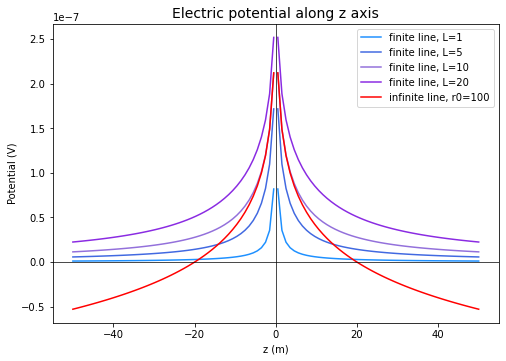

In [400]:
#sampling matrix
Efield_z = []
num_samp = 100 # number of sampling along z axis
z = 50 #sampling length along z axis
for i in np.linspace(-z,+z,num_samp):
    Efield_z.append([0,0,i])
Efield_z_only = np.linspace(-z,+z,num_samp)

L=1
# charge for each q
q_single = 1 # unit in qC
lambda_q = 20
nq = int(lambda_q*2*L/ q_single)
Efp01,Efn01,zfp01,zfn01 = yieldqiri_potl(L,q_single,lambda_q)[0],yieldqiri_potl(L,q_single,lambda_q)[1],\
                                                yieldqiri_potl(L,q_single,lambda_q)[2],yieldqiri_potl(L,q_single,lambda_q)[3]

L=5
# charge for each q
q_single = 1 # unit in qC
lambda_q = 20
nq = int(lambda_q*2*L/ q_single)
Efp03,Efn03,zfp03,zfn03 = yieldqiri_potl(L,q_single,lambda_q)[0],yieldqiri_potl(L,q_single,lambda_q)[1],\
                                                yieldqiri_potl(L,q_single,lambda_q)[2],yieldqiri_potl(L,q_single,lambda_q)[3]

L=10
# charge for each q
q_single = 1 # unit in qC
lambda_q = 20
nq = int(lambda_q*2*L/ q_single)
Efp05,Efn05,zfp05,zfn05 = yieldqiri_potl(L,q_single,lambda_q)[0],yieldqiri_potl(L,q_single,lambda_q)[1],\
                                                yieldqiri_potl(L,q_single,lambda_q)[2],yieldqiri_potl(L,q_single,lambda_q)[3]

L=20
# charge for each q
q_single = 1 # unit in qC
lambda_q = 20
nq = int(lambda_q*2*L/ q_single)
Efp07,Efn07,zfp07,zfn07 = yieldqiri_potl(L,q_single,lambda_q)[0],yieldqiri_potl(L,q_single,lambda_q)[1],\
                                                yieldqiri_potl(L,q_single,lambda_q)[2],yieldqiri_potl(L,q_single,lambda_q)[3]

#calculate the sampling point under the effect of the finite line and infinite one
E_infiniteLine = []
for i in Efield_z:
    #E_finiteLine.append(-Efield_sum(i,ri,qi)[2])
    #minus sign means the vector should point from the charge along the line to the test point sampling along z axis
    #print(-Efield_sum(i,ri,qi))
    E_infiniteLine.append(2*K*lambda_q*e*np.log(20/abs(i[2])))

#seperate the positive and negtive parts
E_infinL_posi = []
E_infinL_neg = []
z_infinL_posi = []
z_infinL_neg = []

for i in range(len(Efield_z_only)):      
    if i>len(Efield_z_only)/2 - 1:
        E_infinL_posi.append(E_infiniteLine[i])
        z_infinL_posi.append(Efield_z_only[i])
    else:
        E_infinL_neg.append(E_infiniteLine[i])
        z_infinL_neg.append(Efield_z_only[i])  

#Plot the electric field strength against z axis
plt.figure(figsize=(8,5.5)) 
plt.title('Electric potential along z axis',fontsize=14)
plt.plot(zfp01, Efp01, marker='', label='finite line, L=1',color='dodgerblue')
plt.plot(zfn01, Efn01, marker='',color='dodgerblue')


plt.plot(zfp03, Efp03, marker='', label='finite line, L=5',color='royalblue')
plt.plot(zfn03, Efn03, marker='',color='royalblue')


plt.plot(zfp05, Efp05, marker='', label='finite line, L=10',color='mediumpurple')
plt.plot(zfn05, Efn05, marker='',color='mediumpurple')


plt.plot(zfp07, Efp07, marker='', label='finite line, L=20',color='blueviolet')
plt.plot(zfn07, Efn07, marker='',color='blueviolet')

plt.plot(z_infinL_posi, E_infinL_posi, marker='', label='infinite line, r0=100',color='r')
plt.plot(z_infinL_neg, E_infinL_neg, marker='',color='r')

plt.xlabel('z (m)')
plt.ylabel('Potential (V)')


#plt.xlim([-50,50])
#plt.ylim([-1e-8,1e-8])


plt.axvline(0,linewidth=0.7,color='black')
plt.axhline(0,linewidth=0.7,color='black')
plt.legend()
plt.show()




In [288]:
sml_test_z = np.linspace(1,100,100)


In [289]:
def yieldTestV(L):
    sml_test_V_1 = []
    L= L
    for i in sml_test_z:
        V = 2*K*lambda_q*e*np.log((L+(L**2+i**2)**0.5)/i)
        sml_test_V_1.append(V)
    return sml_test_V_1

In [286]:
L = 100
2*K*lambda_q*e*np.log((L+(L**2+i**2)**0.5)/i)

5.119480096641048e-08

In [287]:
yieldTestV(2)

[8.318153185984967e-08]

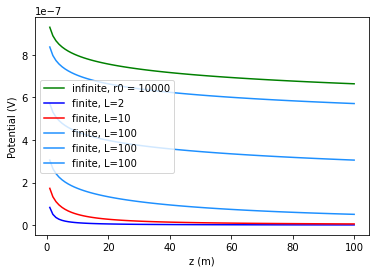

In [297]:
sml_test_V_infi = []
for i in sml_test_z:
    #E_finiteLine.append(-Efield_sum(i,ri,qi)[2])
    #minus sign means the vector should point from the charge along the line to the test point sampling along z axis
    #print(-Efield_sum(i,ri,qi))
    sml_test_V_infi.append(2*K*lambda_q*e*np.log(10000000/i))




plt.plot(sml_test_z,sml_test_V_infi, marker='',label='infinite, r0 = 10000',color='g')

plt.plot(sml_test_z, yieldTestV(2), marker='', label='finite, L=2',color='b')
plt.plot(sml_test_z, yieldTestV(10), marker='',label='finite, L=10',color='r')
plt.plot(sml_test_z, yieldTestV(100), marker='',label='finite, L=100',color='dodgerblue')
plt.plot(sml_test_z, yieldTestV(10000), marker='',label='finite, L=100',color='dodgerblue')
plt.plot(sml_test_z, yieldTestV(1000000), marker='',label='finite, L=100',color='dodgerblue')

plt.xlabel('z (m)')
plt.ylabel('Potential (V)')


#plt.xlim([-50,50])
#plt.ylim([-1e-8,1e-8])



plt.legend()
plt.show()

## XY 2D

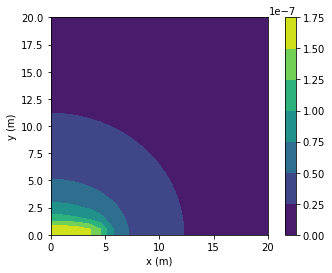

In [384]:
# test the critical value
#def variable_potl(here_vari):
L = 5 # in [m]

q_single = 1 # unit in qC
lambda_q = 20
nq = int(lambda_q*2*L/ q_single)



#Thus, qi (charge per discrete charge) can be calculated, in [qC]
qi = np.full(nq,q_single) #charge per discrete charge, in [qC]

#Generate the ri, for all the charges
ri = []
for i in np.linspace(-L,+L,nq):
    ri.append([i,0,0])
ri = np.array(ri)



#Set all the test points and vectors for each points

ri_2D = []
for i in np.linspace(-L,+L,nq):
    ri_2D.append([i,0])
ri_2D = np.array(ri_2D)

#generate the mesh points for Efield
x_list = []
z_list = []
num_samp_x = 40 # number of sampling along x,z axis
len_x =20 #sampling length along x axis
num_samp_z = 40 # number of sampling along z axis
len_z = 20 #sampling length along z axis
x_samp=np.linspace(-len_x,+len_x,num_samp_x)
z_samp=np.linspace(-len_z,+len_z,num_samp_z)

xx_samp, zz_samp = np.meshgrid(x_samp, z_samp)
coord_samp =np.stack((xx_samp, zz_samp),axis=-1)




#polt contour for Efield
z_Efield = coord_samp
z_Efield_magni = []

for i in range(len(coord_samp)):
    aList=[]
    for j in range(len(coord_samp[i])):
        aList.append(potl_sum(coord_samp[i][j],ri,qi))
    z_Efield_magni.append(aList)

#print(z_Efield_magni)
plt.contourf(xx_samp, zz_samp, z_Efield_magni)
plt.axis('scaled')

plt.xlabel('x (m)')
plt.ylabel('y (m)')

plt.xlim([0,20])
plt.ylim([0,20])




plt.colorbar()
plt.show()

In [388]:
xx_samp[0][18:21]

array([-1.53846154, -0.51282051,  0.51282051])

In [398]:
# test the critical value
def variable_potl(here_vari):
    L = here_vari # in [m]

    q_single = 1 # unit in qC
    lambda_q = 20
    nq = int(lambda_q*2*L/ q_single)



    #Thus, qi (charge per discrete charge) can be calculated, in [qC]
    qi = np.full(nq,q_single) #charge per discrete charge, in [qC]

    #Generate the ri, for all the charges
    ri = []
    for i in np.linspace(-L,+L,nq):
        ri.append([i,0,0])
    ri = np.array(ri)
    
    
    
    #Set all the test points and vectors for each points

    ri_2D = []
    for i in np.linspace(-L,+L,nq):
        ri_2D.append([i,0])
    ri_2D = np.array(ri_2D)

    #generate the mesh points for Efield
    x_list = []
    z_list = []
    num_samp_x = 40 # number of sampling along x,z axis
    len_x =20 #sampling length along x axis
    num_samp_z = 40 # number of sampling along z axis
    len_z = 20 #sampling length along z axis
    x_samp=np.linspace(-len_x,+len_x,num_samp_x)
    z_samp=np.linspace(-len_z,+len_z,num_samp_z)

    xx_samp, zz_samp = np.meshgrid(x_samp, z_samp)
    coord_samp =np.stack((xx_samp, zz_samp),axis=-1)
    
    
    
    
    #polt contour for Efield
    z_Efield = coord_samp
    z_Efield_magni = []

    for i in range(len(coord_samp)):
        aList=[]
        for j in range(len(coord_samp[i])):
            aList.append(potl_sum(coord_samp[i][j],ri,qi))
        z_Efield_magni.append(aList)

    #print(z_Efield_magni)
    plt.contourf(xx_samp, zz_samp, z_Efield_magni)
    plt.axis('scaled')
    
    plt.xlabel('x (m)')
    plt.ylabel('z (m)')

    plt.xlim([0,20])
    plt.ylim([0,20])

    
    
    
    plt.colorbar()
    plt.show()

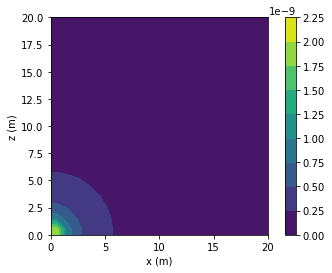

In [399]:
variable_potl(0.025)

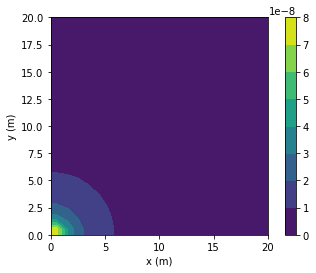

In [303]:
variable_potl(1)

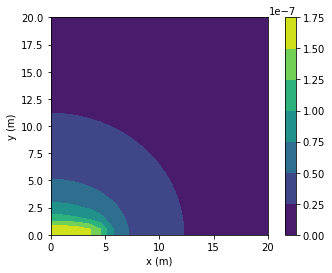

In [304]:
variable_potl(5)

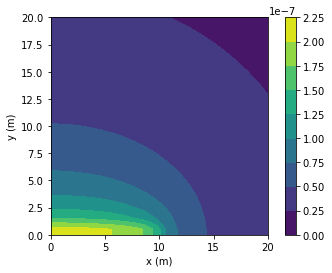

In [305]:
variable_potl(10)

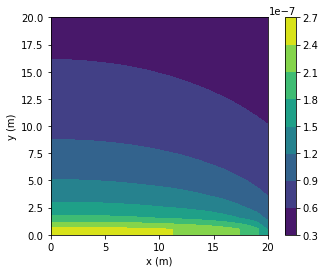

In [306]:
variable_potl(20)

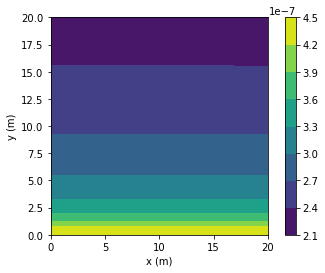

In [346]:
variable_potl(500)

# Create other diagrams

In [312]:
#sampling matrix
Efield_z = []
num_samp = 100 # number of sampling along z axis
z = 50 #sampling length along z axis
for i in np.linspace(-z,+z,num_samp):
    Efield_z.append([0,0,i])
Efield_z_only = np.linspace(-z,+z,num_samp)


L=5
# charge for each q
q_single = 1 # unit in qC
lambda_q = 20
nq = int(lambda_q*2*L/ q_single)

qi = np.full(nq,q_single) #charge per discrete charge, in [qC]

#Generate the ri, for all the charges
ri = []
for i in np.linspace(-L,+L,nq):
    ri.append([i,0,0])
ri = np.array(ri)


#calculate the sampling point under the effect of the finite line and infinite one
EE_2D = []
for i in Efield_z:
    v1 = Efield_sum(i,ri,qi)[1:]
    EE_2D.append(v1)
    #E_finiteLine_2D.append(v1)






AxisError: axis 2 is out of bounds for array of dimension 2

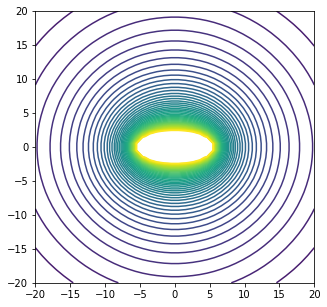

In [313]:
L = 5 # in [m]

q_single = 1 # unit in qC
lambda_q = 20
nq = int(lambda_q*2*L/ q_single)



#Thus, qi (charge per discrete charge) can be calculated, in [qC]
qi = np.full(nq,q_single) #charge per discrete charge, in [qC]

#Generate the ri, for all the charges
ri = []
for i in np.linspace(-L,+L,nq):
    ri.append([i,0,0])
ri = np.array(ri)



#Set all the test points and vectors for each points

ri_2D = []
for i in np.linspace(-L,+L,nq):
    ri_2D.append([i,0])
ri_2D = np.array(ri_2D)

#generate the mesh points for Efield
x_list = []
z_list = []
num_samp_x = 40 # number of sampling along x,z axis
len_x =20 #sampling length along x axis
num_samp_z = 40 # number of sampling along z axis
len_z = 20 #sampling length along z axis
x_samp=np.linspace(-len_x,+len_x,num_samp_x)
z_samp=np.linspace(-len_z,+len_z,num_samp_z)

xx_samp, zz_samp = np.meshgrid(x_samp, z_samp)
coord_samp =np.stack((xx_samp, zz_samp),axis=-1)




#polt contour for Efield
z_Efield = coord_samp
PP = []

for i in range(len(coord_samp)):
    aList=[]
    for j in range(len(coord_samp[i])):
        aList.append(potl_sum(coord_samp[i][j],ri,qi))
    PP.append(aList)

'''#print(z_Efield_magni)
plt.contourf(xx_samp, zz_samp, z_Efield_magni)
plt.axis('scaled')

plt.xlabel('x (m)')
plt.ylabel('y (m)')

plt.xlim([0,20])
plt.ylim([0,20])




plt.colorbar()
plt.show()
'''








#Slice the 3D value matrix to 2D


#plot the first
FACTOR = 5e-1
levels = np.linspace(np.nanmin(PP) * FACTOR, np.nanmax(PP) * FACTOR, 50)

fig, ax = plt.subplots(figsize=(5,5))
ax.contour(x_samp, z_samp, PP, levels)

lw = np.linalg.norm(EE_2D, axis=2)
lw /= lw.max()
ax.streamplot(x_samp, z_samp, EE_2D[:, :, 0], EE_2D[:, :, 1], linewidth=7*lw, density=2,color='sienna')
ax.set_xlabel('x (m)')
ax.set_ylabel('z (m)')
ax.set_title('Molecule Potential')
ax.axis('equal')


In [ ]:
#Debugging Part 3/3





samp_x, samp_y, samp_z, samp_yy, samp_zz, samp_xx, Efield_molecule2D,potl_molecules = yieldPotlEfield(r_randMolecules,q_randMolecules,50,-0.5,1.5)
@interact
def plot_2(Z_Index=(0, len(potl_molecules), 1),Line_Width=(1,15,1)):
    #Slice the 3D value matrix to 2D
    Efield_molecule2D_2D = Efield_molecule2D[Z_Index]
    potl_molecules_2D = potl_molecules[Z_Index]
    #plot the first
    FACTOR = 5e-1
    levels = np.linspace(np.nanmin(potl_molecules_2D) * FACTOR, np.nanmax(potl_molecules_2D) * FACTOR, 50)

    fig, ax = plt.subplots(figsize=(5,5))
    ax.contour(samp_x, samp_y, potl_molecules_2D, levels)

    lw = np.linalg.norm(Efield_molecule2D_2D, axis=2)
    lw /= lw.max()
    ax.streamplot(samp_x, samp_y, Efield_molecule2D_2D[:, :, 0], Efield_molecule2D_2D[:, :, 1], linewidth=Line_Width*lw, density=2,color='sienna')
    ax.set_xlabel('x (nm)')
    ax.set_ylabel('y (nm)')
    ax.set_title('Molecule Potential')
    ax.axis('equal')


    #plot the second
    fig, ax = plt.subplots()
    mappable = ax.pcolormesh(samp_x, samp_y, potl_molecules_2D)
    ax.set_xlabel('x (nm)')
    ax.set_ylabel('y (nm)')
    ax.set_title('Molecule Potential')
    plt.colorbar(mappable);

# Other diagrams

In [337]:
#Degugging Part 1/3
#this example defines three CO2 molecules, positioned at (0,0,0), (0.2,0.2,0.2), (0.4,0.4,0.4) in the units used and with no rotation
#sampling matrix
Efield_z = []
num_samp = 100 # number of sampling along z axis
z = 50 #sampling length along z axis
for i in np.linspace(-z,+z,num_samp):
    Efield_z.append([0,0,i])
Efield_z_only = np.linspace(-z,+z,num_samp)


L=5
# charge for each q
q_single = 1 # unit in qC
lambda_q = 20 #20!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
nq = int(lambda_q*2*L/ q_single)

qi = np.full(nq,q_single) #charge per discrete charge, in [qC]

#Generate the ri, for all the charges
ri = []
for i in np.linspace(-L,+L,nq):
    ri.append([i,0,0])
ri = np.array(ri)

rall=ri
qall=qi

def yieldPotlEfield2(ri,qi,num_samp,start_coord,end_coord):
    samp_x= np.linspace(start_coord,end_coord,num_samp) #sampling length along z axis
    samp_y= np.linspace(start_coord,end_coord,num_samp)
    samp_z= np.linspace(start_coord,end_coord,num_samp)
    samp_yy, samp_zz, samp_xx = np.meshgrid(samp_y, samp_z,samp_x)

    #calculate potl, Efield for each test points          
    potl_molecules = []
    Efield_molecule2D = []

    for i in range(len(samp_xx)):
        pinlistV1=[]
        pinlistE1_2D=[]
        for j in range(len(samp_xx[i])):
            pinlistV2=[]
            pinlistE2_2D=[]

            for k in range(len(samp_xx[i][j])):
                EfieldVectorL2D=[]
                r0 = np.array([samp_xx[i][j][k],samp_yy[i][j][k],samp_zz[i][j][k]])
                #Calcluate 1D potl for each in 3D
                pinlistV2.append(potl_sum(r0,ri,qi))
                
                #Calcluate 2D Efield (x,z) for each in 3D
                EfieldVector = -Efield_sum(r0,ri,qi)
                EfieldVectorL2D.append(EfieldVector[0])
                EfieldVectorL2D.append(EfieldVector[1])
                pinlistE2_2D.append(EfieldVectorL2D)
            pinlistV1.append(pinlistV2)
            pinlistE1_2D.append(pinlistE2_2D)
        potl_molecules.append(pinlistV1)
        Efield_molecule2D.append(pinlistE1_2D)
    return samp_x, samp_y, samp_z, samp_yy, samp_zz, samp_xx, np.array(Efield_molecule2D), np.array(potl_molecules)

In [ ]:
samp_x, samp_y, samp_z, samp_yy, samp_zz, samp_xx, Efield_molecule2D,potl_molecules = yieldPotlEfield2(rall,qall,40,-20,20)


In [340]:
#Debugging Part 3/3
###########(rall,qall,40,-20,20)
@interact
def plot_2(Z_Index=(0, len(potl_molecules), 1),Line_Width=(1,15,1)):
    #Slice the 3D value matrix to 2D
    Efield_molecule2D_2D = Efield_molecule2D[Z_Index]
    potl_molecules_2D = potl_molecules[Z_Index]
    #plot the first
    FACTOR = 5e-1
    levels = np.linspace(np.nanmin(potl_molecules_2D) * FACTOR, np.nanmax(potl_molecules_2D) * FACTOR, 20)

    fig, ax = plt.subplots(figsize=(5,5))
    CONT = ax.contour(samp_x, samp_y, potl_molecules_2D, levels, linewidths=0.7)
    
    CB = plt.colorbar(CONT)
    CB.set_label('Electric Potential',size=8)
    lw = np.linalg.norm(Efield_molecule2D_2D, axis=2)
    lw /= lw.max()
    #linewidth=Line_Width*lw,
    ax.streamplot(samp_x, samp_y, Efield_molecule2D_2D[:, :, 0], Efield_molecule2D_2D[:, :, 1], linewidth=Line_Width, density=1,color='sienna')
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_title('Electric Potential and field strength')
    ax.axis('equal')
    



interactive(children=(IntSlider(value=20, description='Z_Index', max=40), IntSlider(value=8, description='Line…

# small situation

In [376]:
#Degugging Part 1/3
#this example defines three CO2 molecules, positioned at (0,0,0), (0.2,0.2,0.2), (0.4,0.4,0.4) in the units used and with no rotation
#sampling matrix

L=5
# charge for each q
q_single = 1 # unit in qC
lambda_q = 20 #20!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
nq = int(lambda_q*2*L/ q_single)

qi = np.full(nq,q_single) #charge per discrete charge, in [qC]

#Generate the ri, for all the charges
ri = []
for i in np.linspace(-L,+L,nq):
    ri.append([i,0,0])
ri = np.array(ri)

rall=ri
qall=qi

num_samp=40
start_coord = -20
end_coord = 20

samp_x= np.linspace(start_coord,end_coord,num_samp) #sampling length along z axis
samp_y= np.linspace(start_coord,end_coord,num_samp)
samp_z= np.linspace(start_coord,end_coord,num_samp)
samp_yy, samp_zz, samp_xx = np.meshgrid(samp_y, samp_z,samp_x)

#calculate potl, Efield for each test points          
potl_molecules = []
Efield_molecule2D = []


r_test = np.array
for i in range(len(samp_xx)):
    pinlistV1=[]
    pinlistE1_2D=[]
    for j in range(len(samp_xx[i])):
        pinlistV2=[]
        pinlistE2_2D=[]

        for k in range(len(samp_xx[i][j])):
            EfieldVectorL2D=[]
            r0 = np.array([samp_xx[i][j][k],samp_yy[i][j][k],samp_zz[i][j][k]])
            print(r0)
            #Calcluate 1D potl for each in 3D
            pinlistV2.append(potl_sum(r0,ri,qi))

            #Calcluate 2D Efield (x,z) for each in 3D
            EfieldVector = -Efield_sum(r0,ri,qi)
            EfieldVectorL2D.append(EfieldVector[0])
            EfieldVectorL2D.append(EfieldVector[1])
            pinlistE2_2D.append(EfieldVectorL2D)
        pinlistV1.append(pinlistV2)
        pinlistE1_2D.append(pinlistE2_2D)
    potl_molecules.append(pinlistV1)
    Efield_molecule2D.append(pinlistE1_2D)


In [377]:
samp_x, samp_y, samp_z, samp_yy, samp_zz, samp_xx, Efield_molecule2D,potl_molecules = yieldPotlEfield2(rall,qall,40,-20,20)


In [9]:
L=5
# charge for each q
q_single = 1 # unit in qC
lambda_q = 1 #20!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
nq = int(lambda_q*2*L/ q_single)

qi = np.full(nq,q_single) #charge per discrete charge, in [qC]

#Generate the ri, for all the charges
ri = []
for i in np.linspace(-L,+L,nq):
    ri.append([i,0,0])
ri = np.array(ri)




-Efield_sum(np.array([0, 0, 20]),ri,qi)

array([-0.00000000e+00, -0.00000000e+00,  1.43829133e-12])

In [410]:
1.4257462494858578e-08


8991804694.457363

In [378]:
#Debugging Part 3/3
###########(rall,qall,40,-20,20)
@interact
def plot_2(Z_Index=(0, len(potl_molecules), 1),Line_Width=(1,15,1)):
    #Slice the 3D value matrix to 2D
    Efield_molecule2D_2D = Efield_molecule2D[Z_Index]
    potl_molecules_2D = potl_molecules[Z_Index]
    #plot the first
    FACTOR = 5e-1
    levels = np.linspace(np.nanmin(potl_molecules_2D) * FACTOR, np.nanmax(potl_molecules_2D) * FACTOR, 20)

    fig, ax = plt.subplots(figsize=(5,5))
    CONT = ax.contour(samp_x, samp_y, potl_molecules_2D, levels, linewidths=0.7)
    
    CB = plt.colorbar(CONT)
    CB.set_label('Electric Potential',size=8)
    lw = np.linalg.norm(Efield_molecule2D_2D, axis=2)
    lw /= lw.max()
    #linewidth=Line_Width*lw,
    ax.streamplot(samp_x, samp_y, Efield_molecule2D_2D[:, :, 0], Efield_molecule2D_2D[:, :, 1], linewidth=1, density=1,color='sienna')
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_title('Electric Potential and field strength')
    ax.axis('equal')
    



interactive(children=(IntSlider(value=20, description='Z_Index', max=40), IntSlider(value=8, description='Line…

In [379]:
len(Efield_molecule2D)/2

20.0

In [380]:
Efield_molecule2D_2D = Efield_molecule2D[19]

In [382]:
samp_x[0]

-20.0

In [383]:
samp_y[9]

-10.76923076923077

In [381]:
Efield_molecule2D_2D[0][19]

array([-1.68178625e-11, -6.97249533e-10])

In [363]:
Efield_molecule2D_2D[:, :, 1]

array([[-5.53864093e-10, -6.40893032e-10, -7.36306043e-10,
        -8.37394958e-10, -9.39964647e-10, -1.03856699e-09,
        -1.12708882e-09, -1.19955183e-09, -1.25088532e-09,
        -1.27748024e-09, -1.27748024e-09, -1.25088532e-09,
        -1.19955183e-09, -1.12708882e-09, -1.03856699e-09,
        -9.39964647e-10, -8.37394958e-10, -7.36306043e-10,
        -6.40893032e-10, -5.53864093e-10],
       [-5.96859745e-10, -7.04325372e-10, -8.25464365e-10,
        -9.57120712e-10, -1.09360437e-09, -1.22695394e-09,
        -1.34794403e-09, -1.44754130e-09, -1.51824467e-09,
        -1.55488676e-09, -1.55488676e-09, -1.51824467e-09,
        -1.44754130e-09, -1.34794403e-09, -1.22695394e-09,
        -1.09360437e-09, -9.57120712e-10, -8.25464365e-10,
        -7.04325372e-10, -5.96859745e-10],
       [-6.38065011e-10, -7.70995540e-10, -9.26094716e-10,
        -1.10011551e-09, -1.28535327e-09, -1.46977896e-09,
        -1.63887359e-09, -1.77853069e-09, -1.87755974e-09,
        -1.92876040e-09, -1.9

In [355]:
print(Efield_molecule2D_2D[:, :, 0])

[[-2.52374945e-10 -2.57878413e-10 -2.62579747e-10 ...  2.62579747e-10
   2.57878413e-10  2.52374945e-10]
 [-2.73001859e-10 -2.80097978e-10 -2.86421279e-10 ...  2.86421279e-10
   2.80097978e-10  2.73001859e-10]
 [-2.95344107e-10 -3.04338718e-10 -3.12626754e-10 ...  3.12626754e-10
   3.04338718e-10  2.95344107e-10]
 ...
 [-2.95344107e-10 -3.04338718e-10 -3.12626754e-10 ...  3.12626754e-10
   3.04338718e-10  2.95344107e-10]
 [-2.73001859e-10 -2.80097978e-10 -2.86421279e-10 ...  2.86421279e-10
   2.80097978e-10  2.73001859e-10]
 [-2.52374945e-10 -2.57878413e-10 -2.62579747e-10 ...  2.62579747e-10
   2.57878413e-10  2.52374945e-10]]
